In [3]:
#import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Reading the raw data in the CSV file into a dataframe, df

df = pd.read_csv("car_sales.csv")

#Show the first five rows
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [6]:
#checking for missing values

df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [14]:
#DESCRIPTIVES

df.describe().round(3)

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2500000.000,2500000.000,2500000.000,2500000.000
mean,2015.996,30012.179,0.100,3001.005
std,3.739,11545.137,0.029,1481.467
min,2010.000,10000.000,0.050,501.340
25%,2013.000,20019.000,0.075,1821.710
50%,2016.000,30006.000,0.100,2741.910
75%,2019.000,40022.000,0.125,3978.142
max,2022.000,50000.000,0.150,7494.530


In [18]:
#total number of car makes and models

make_counts = df['Car Make'].value_counts()
model_counts = df['Car Model'].value_counts()
print('Car makes:\n', make_counts)
print('car models:\n', model_counts)



Car makes:
 Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: Car Make, dtype: int64
car models:
 Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: Car Model, dtype: int64


In [45]:
#Top Salesperson
    
    # Based on number of transactions
top_transactions = df['Salesperson'].value_counts().head(10)
print('Top Salespersons based on transactions:\n', top_transactions)

print(' ')

    #Based on commision earned
    
top_commision = df.groupby('Salesperson')['Commission Earned'].sum().nlargest(10)

print('Top salesperson based on commision earned:\n', top_commision)


Top Salespersons based on transactions:
 Michael Smith        1229
Michael Johnson       976
David Smith           821
James Smith           796
Jennifer Smith        753
Michael Williams      752
Christopher Smith     751
Robert Smith          743
John Smith            742
Michael Jones         694
Name: Salesperson, dtype: int64
 
Top salesperson based on commision earned:
 Salesperson
Michael Smith        3658467.56
Michael Johnson      2883629.29
David Smith          2456566.33
James Smith          2448405.59
Robert Smith         2275950.52
Michael Williams     2263033.88
Jennifer Smith       2233631.21
John Smith           2227050.87
Christopher Smith    2222190.97
Michael Jones        2083043.66
Name: Commission Earned, dtype: float64


(2000000.0, 4000000.0)

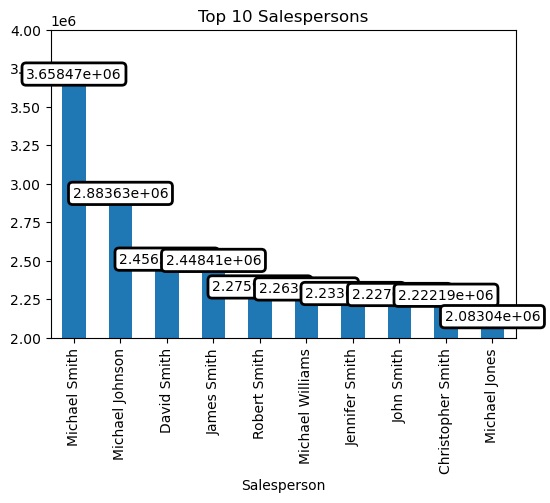

In [6]:
#Data analysis

    #Commission Earned By Top Sales Persons
    
top_commision = df.groupby('Salesperson')['Commission Earned'].sum().nlargest(10)
top_commisionplt=top_commision.plot(kind='bar',y=['Commission Earned'],linewidth=2,figsize=(6,4),title='Top 10 Salespersons')
top_commisionplt.bar_label(top_commisionplt.containers[0], label_type='edge',padding=1,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.ylim(2000000,4000000)

(191000.0, 193200.0)

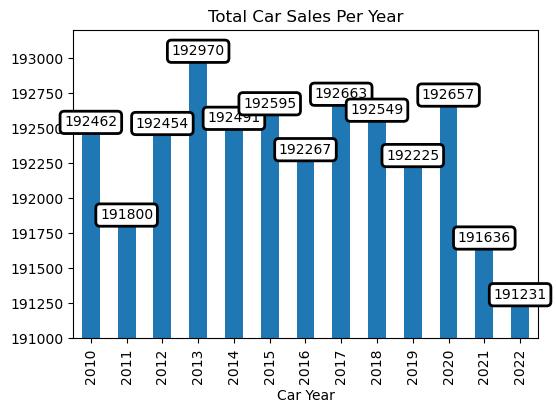

In [16]:
#Car sales based on the years


sales_per_year = df.groupby('Car Year')['Car Year'].count()
sales_per_yearplt=sales_per_year.plot(kind='bar',y=['Year'],linewidth=2,figsize=(6,4),title='Total Car Sales Per Year')
sales_per_yearplt.bar_label(sales_per_yearplt.containers[0], label_type='edge',padding=3,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.ylim(191000,193200)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6972\844098960.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6972\844098960.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


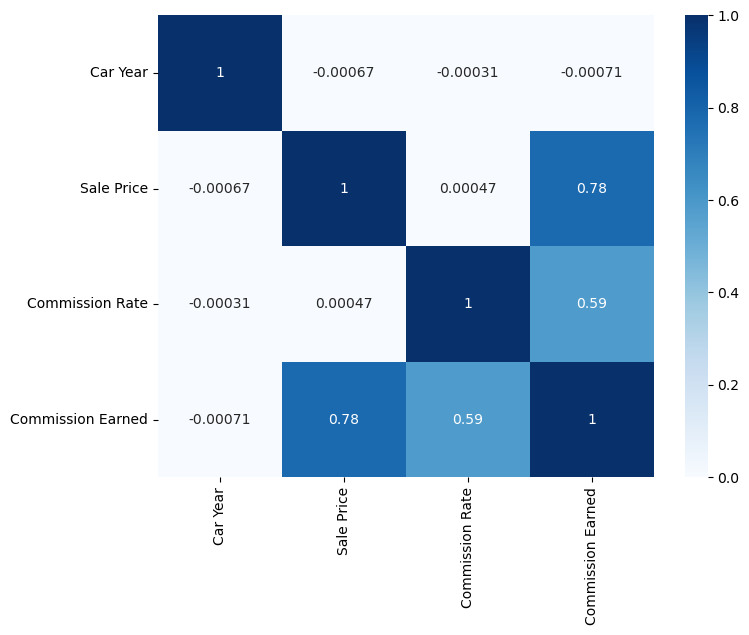

In [22]:
#Correlation between attributes

df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()